In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid

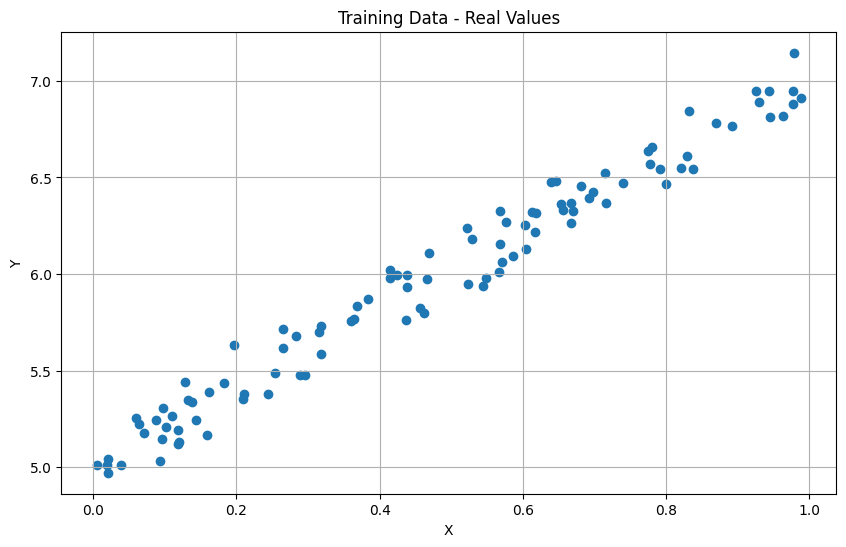

In [40]:
real_weight = 2
real_bias = 5
num_samples = 100   

mean = 0     
std_dev = 0.1  

# Set constant seed
np.random.seed(0)

# Create 100 random X points
X_raw = np.random.rand(100, 1)

# Generate gaussian noise
noise = np.random.normal(mean, std_dev, size=(num_samples, 1))

# Calculate Y points
Y = real_weight * X_raw + real_bias + noise

# Plot data
plt.figure(figsize=(10, 6))
plt.title("Training Data - Real Values")
plt.scatter(X_raw, Y, label="Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

### Gradient Descent

In [41]:
# Prepare data
X = np.concatenate([X_raw, np.ones((num_samples, 1))], axis=1)
Y = Y.ravel()

weights = np.zeros(2) # [weight, bias]

# Set hyperparameters
lr = 0.4
epochs = 80

# Model training
for epoch in range(epochs):
    Y_pred = X @ weights
    error = Y_pred - Y
    gradients = (2/num_samples) * X.T @ error 
    weights -= lr * gradients

    print(f'Epoch {epoch}: {weights}')

print("Final weights:", weights)

Epoch 0: [2.3886737  4.77185689]
Epoch 1: [2.38647084 4.8227481 ]
Epoch 2: [2.36555954 4.83375954]
Epoch 3: [2.34561333 4.84387122]
Epoch 4: [2.32673575 4.85343791]
Epoch 5: [2.3088708  4.86249141]
Epoch 6: [2.29196415 4.87105926]
Epoch 7: [2.2759644  4.87916752]
Epoch 8: [2.2608229  4.88684084]
Epoch 9: [2.24649362 4.89410255]
Epoch 10: [2.23293299 4.90097472]
Epoch 11: [2.22009978 4.90747827]
Epoch 12: [2.20795496 4.91363295]
Epoch 13: [2.1964616  4.91945748]
Epoch 14: [2.18558478 4.92496957]
Epoch 15: [2.1752914  4.93018599]
Epoch 16: [2.16555018 4.93512259]
Epoch 17: [2.15633149 4.93979438]
Epoch 18: [2.14760731 4.94421557]
Epoch 19: [2.13935111 4.9483996 ]
Epoch 20: [2.13153778 4.95235919]
Epoch 21: [2.12414358 4.95610638]
Epoch 22: [2.11714602 4.95965257]
Epoch 23: [2.11052381 4.96300853]
Epoch 24: [2.10425683 4.96618447]
Epoch 25: [2.09832603 4.96919005]
Epoch 26: [2.09271336 4.97203441]
Epoch 27: [2.08740176 4.97472619]
Epoch 28: [2.08237509 4.97727357]
Epoch 29: [2.07761806 4.

In [ ]:
param_grid = {
    'lr': [0.2, 0.4, 0.6, 0.8],
    'epochs': [32, 64, 128, 256] 
}

results_list = []
 
# Searching for best parameters
for params in ParameterGrid(param_grid):
    weights = np.zeros(2)
    for epoch in range(params['epochs']):
        Y_pred = X @ weights
        error = Y_pred - Y
        gradients = (2/num_samples) * X.T @ error 
        weights -= params['lr'] * gradients

    mse = np.mean(error ** 2)
    results_list.append({'lr': params['lr'], 'epochs': params['epochs'], 'mse': mse, 'weights': weights})

for i, results in enumerate(results_list):
    print(f'index: {i}, results: {results}')

index: 0, results: {'lr': 0.2, 'epochs': 32, 'mse': np.float64(0.012931028161495132), 'weights': array([2.17751265, 4.92906032])}
index: 1, results: {'lr': 0.4, 'epochs': 32, 'mse': np.float64(0.010455974333171143), 'weights': array([2.06885583, 4.98412478])}
index: 2, results: {'lr': 0.6, 'epochs': 32, 'mse': np.float64(0.010013805945117844), 'weights': array([2.02364666, 5.00703562])}
index: 3, results: {'lr': 0.8, 'epochs': 32, 'mse': np.float64(12.691607829340462), 'weights': array([0.58351218, 2.21074457])}
index: 4, results: {'lr': 0.2, 'epochs': 64, 'mse': np.float64(0.010452126953207321), 'weights': array([2.07070581, 4.98318726])}
index: 5, results: {'lr': 0.4, 'epochs': 64, 'mse': np.float64(0.00993998677929558), 'weights': array([2.00656945, 5.01568991])}
index: 6, results: {'lr': 0.6, 'epochs': 64, 'mse': np.float64(0.00992480323604171), 'weights': array([1.99573836, 5.02117883])}
index: 7, results: {'lr': 0.8, 'epochs': 64, 'mse': np.float64(4.342685466773852), 'weights': 

In [43]:
# Saving best weights, best MSE for parameters: lr = 0.4, epochs = 128
weights = results_list[9]['weights']
best_mse = results_list[9]['mse']


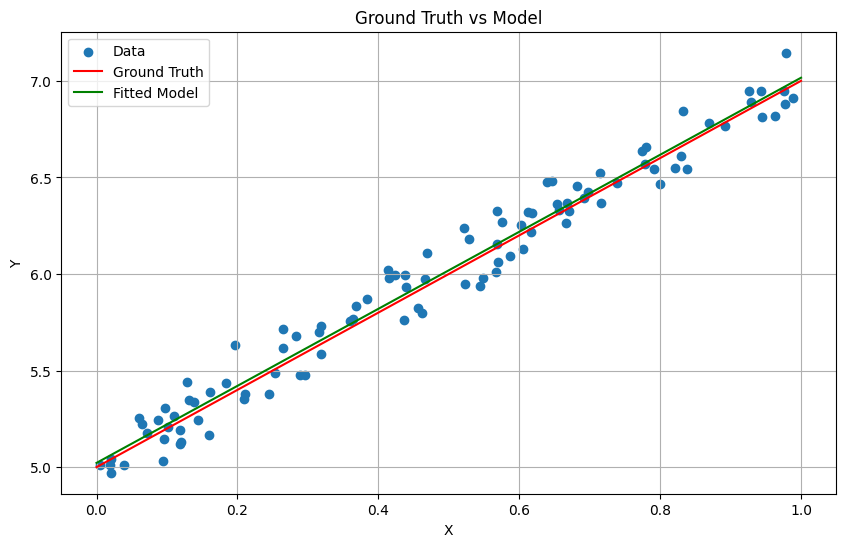

True weights: [2, 5]
Learned weights: [1.99407137 5.02202362]


In [44]:
# Plot data
plt.figure(figsize=(10, 6))
plt.scatter(X_raw, Y, label="Data")

# Plot the ground truth line
x_values = np.linspace(0, 1, 100)
y_true = real_weight * x_values + real_bias
plt.plot(x_values, y_true, label="Ground Truth", color='red')

# Plot the fitted model
y_pred = weights[0] * x_values + weights[1]
plt.plot(x_values, y_pred, label="Fitted Model", color='green')

plt.title("Ground Truth vs Model")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

# Compare weights
print("True weights:", [real_weight, real_bias])
print("Learned weights:", weights)

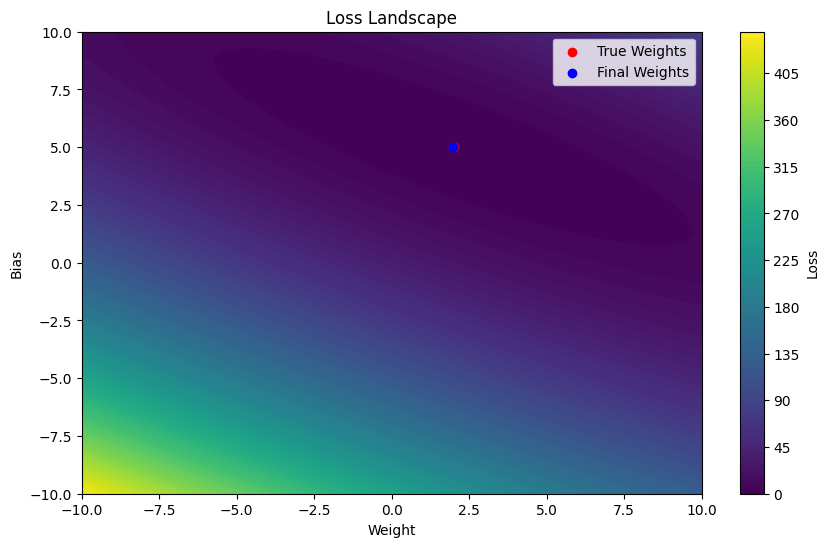

In [45]:
# Generate a grid of weight values
w_range = np.linspace(-10, 10, 100)
b_range = np.linspace(-10, 10, 100)
W, B = np.meshgrid(w_range, b_range)
losses = np.zeros_like(W)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Y_pred = X @ np.array([W[i, j], B[i, j]])
        error = Y_pred - Y
        losses[i, j] = np.mean(error**2)

# Create a contour plot
plt.figure(figsize=(10, 6))
plt.contourf(W, B, losses, levels=100, cmap='viridis')
plt.colorbar(label="Loss")
plt.scatter(real_weight, real_bias, color='red', label="True Weights")
plt.scatter(weights[0], weights[1], color='blue', label="Final Weights")
plt.xlabel("Weight")
plt.ylabel("Bias")
plt.legend()
plt.title("Loss Landscape")
plt.show()


### Analytical Solution

In [46]:
analytical_weights = np.linalg.inv(X.T @ X) @ X.T @ Y

# Calculate error
Y_pred_analytical = X @ analytical_weights
mse_analytical = np.mean((Y_pred_analytical - Y)**2)

# Compare analytical and gradient descent solutions
print(f'Analytical solution: weights: {analytical_weights}, mse: {mse_analytical}')
print(f'Gradient descent solution: weights: {weights}, mse: {best_mse}')


Analytical solution: weights: [1.9936935  5.02221511], mse: 0.009924386487246474
Gradient descent solution: weights: [1.99407137 5.02202362], mse: 0.009924399922569141


### High Dimensional Data

In [47]:
d = 10

# Generate weights
real_weights_hd = np.random.rand(d)
real_bias_hd = 5

# Generate high dimensional data
X_hd = np.random.rand(num_samples, d)
Y_hd = X_hd @ real_weights_hd + real_bias_hd + noise.flatten()

# Add bias column to X matrix
X_hd = np.concatenate([X_hd, np.ones((num_samples, 1))], axis=1)

# Initialize weights (d features + bias)
weights_hd = np.zeros(d + 1)

# Model training - gradient descent
param_grid = {
    'lr': [0.01, 0.05, 0.1, 0.5],
    'epochs': [32, 64, 128, 256] 
}

results_list = []

for params in ParameterGrid(param_grid):
    weights_hd = np.zeros(d + 1)
    for epoch in range(params['epochs']):
        Y_pred = X_hd @ weights_hd
        error = Y_pred - Y_hd
        gradients = (2/num_samples) * X_hd.T @ error 
        weights_hd -= params['lr'] * gradients

    mse = np.mean(error ** 2)
    results_list.append({'lr': params['lr'], 'epochs': params['epochs'], 'mse': mse})

for results in results_list:
    print(f'results: {results}')

results: {'lr': 0.01, 'epochs': 32, 'mse': np.float64(0.8547876058570145)}
results: {'lr': 0.05, 'epochs': 32, 'mse': np.float64(0.28720555132009884)}
results: {'lr': 0.1, 'epochs': 32, 'mse': np.float64(0.242295271812819)}
results: {'lr': 0.5, 'epochs': 32, 'mse': np.float64(4.110355495243911e+26)}
results: {'lr': 0.01, 'epochs': 64, 'mse': np.float64(0.32563376011128947)}
results: {'lr': 0.05, 'epochs': 64, 'mse': np.float64(0.24120571254780007)}
results: {'lr': 0.1, 'epochs': 64, 'mse': np.float64(0.17846542111160893)}
results: {'lr': 0.5, 'epochs': 64, 'mse': np.float64(2.225075594710976e+52)}
results: {'lr': 0.01, 'epochs': 128, 'mse': np.float64(0.2968475197175184)}
results: {'lr': 0.05, 'epochs': 128, 'mse': np.float64(0.1778289678386539)}
results: {'lr': 0.1, 'epochs': 128, 'mse': np.float64(0.10550434735394534)}
results: {'lr': 0.5, 'epochs': 128, 'mse': np.float64(6.5204195605681586e+103)}
results: {'lr': 0.01, 'epochs': 256, 'mse': np.float64(0.2570664863086668)}
results: {'

### Conclusion
We can see that in the case of high-dimensional data we have to set the learning rate much lower to prevent divergence. This means that each update is smaller, so training requires more iterations to reach convergence.

Best parameters: Learning Rate = 0.1,      Epochs = 256, MSE = 0.04243266824061081


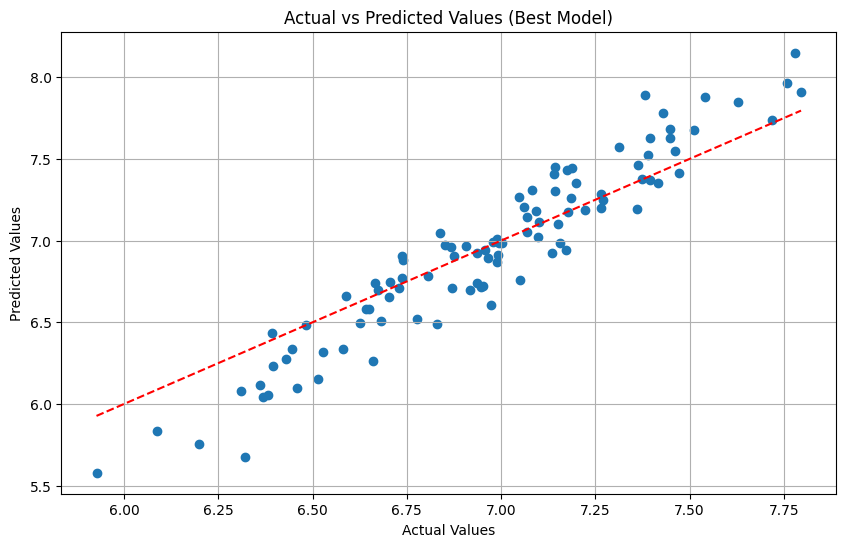

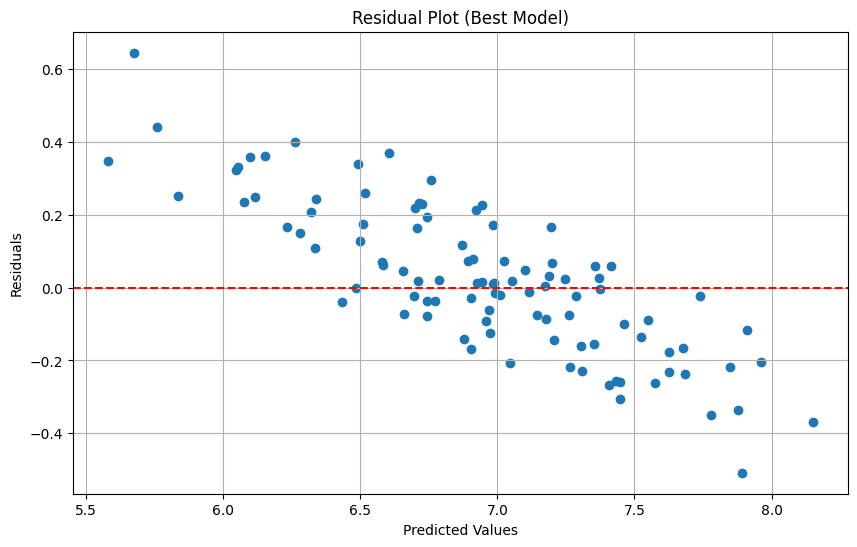

In [48]:
# Get the best parameters based on lowest MSE
best_result = min(results_list, key=lambda x: x['mse'])
print(f"Best parameters: Learning Rate = {best_result['lr']},\
      Epochs = {best_result['epochs']}, MSE = {best_result['mse']}")

# Train model with best parameters
weights_hd_best = np.zeros(d + 1)
for epoch in range(best_result['epochs']):
    Y_pred = X_hd @ weights_hd_best
    error = Y_pred - Y_hd
    gradients = (2/num_samples) * X_hd.T @ error
    weights_hd_best -= best_result['lr'] * gradients

# Generate predictions using best model
Y_pred_best = X_hd @ weights_hd_best

# Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_hd, Y_pred_best)
plt.plot([Y_hd.min(), Y_hd.max()], [Y_hd.min(), Y_hd.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Best Model)')
plt.grid(True)
plt.show()

# Residual plot
residuals = Y_hd - Y_pred_best
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred_best, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Best Model)')
plt.grid(True)
plt.show()